In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import os

In [2]:
# Exemple d'utilisation de la fonction
input_folder = "../data/annotations"
output_folder = "../data/annotations"

In [3]:
# Ajoute une colonne 'video_id' incrémentale aux fichiers CSV dans un dossier
def add_video_id(input_folder, output_folder):
    # Vérifier si le dossier de sortie existe, sinon le créer
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Liste des fichiers CSV dans le dossier
    csv_files = [f for f in os.listdir(input_folder) if f.endswith(".csv")]
    csv_files.sort()  # Tri pour un ordre déterminé (par exemple, alphabétique)
    
    # Parcourir les fichiers CSV avec un compteur pour les 'video_id'
    for idx, file_name in enumerate(csv_files, start=1):  # 'start=1' pour commencer à 1
        input_csv = os.path.join(input_folder, file_name)
        output_csv = os.path.join(output_folder, file_name)
        
        # Charger les données
        data = pd.read_csv(input_csv)
        
        # Ajouter la colonne 'video_id' avec la valeur du compteur
        data['video_id'] = idx
        
        # Réorganiser les colonnes pour mettre 'video_id' en première position
        columns = ['video_id'] + [col for col in data.columns if col != 'video_id']
        data = data[columns]
        
        # Sauvegarder le fichier modifié
        data.to_csv(output_csv, index=False)
        print(f"Fichier traité : {file_name} | video_id attribué : {idx}. Sauvegardé sous : {output_csv}")


In [4]:
add_video_id(input_folder, output_folder)

Fichier traité : video1.csv | video_id attribué : 1. Sauvegardé sous : ../data/annotations\video1.csv
Fichier traité : video10.csv | video_id attribué : 2. Sauvegardé sous : ../data/annotations\video10.csv
Fichier traité : video11.csv | video_id attribué : 3. Sauvegardé sous : ../data/annotations\video11.csv
Fichier traité : video12.csv | video_id attribué : 4. Sauvegardé sous : ../data/annotations\video12.csv
Fichier traité : video2.csv | video_id attribué : 5. Sauvegardé sous : ../data/annotations\video2.csv
Fichier traité : video3.csv | video_id attribué : 6. Sauvegardé sous : ../data/annotations\video3.csv
Fichier traité : video4.csv | video_id attribué : 7. Sauvegardé sous : ../data/annotations\video4.csv
Fichier traité : video5.csv | video_id attribué : 8. Sauvegardé sous : ../data/annotations\video5.csv
Fichier traité : video6.csv | video_id attribué : 9. Sauvegardé sous : ../data/annotations\video6.csv
Fichier traité : video7.csv | video_id attribué : 10. Sauvegardé sous : ../d

### 1. Chargement des données

In [5]:
# Charger les données
data = pd.read_csv("../data/annotations/video1.csv")

# Afficher les premières lignes
data.head()

,video_id,frame_id,object_id,object_type,position_x,position_y,position_z,object_length,object_width,object_height,heading
0,1,0,1,car,1169.210449,363.842346,0,188.707153,220.168457,188.707153,0
1,1,0,2,car,411.912994,332.468170,0,46.878052,70.140747,46.878052,0
2,1,0,3,car,46.771355,388.645050,0,109.515442,93.094376,109.515442,0
3,1,0,4,car,153.213562,376.159637,0,82.776001,138.742676,82.776001,0
4,1,0,5,car,1031.436035,350.034912,0,104.149475,134.557617,104.149475,0


### 2. Nettoyage des données

In [6]:

# Fonction pour nettoyer les données dans un fichier CSV
def clean_csv_file(input_csv, output_csv):
    """
    Nettoie un fichier CSV en supprimant les valeurs manquantes (remplies par 0),
    les doublons et sauvegarde les données nettoyées dans un nouveau fichier.

    Parameters:
        input_csv (str): Chemin du fichier CSV d'entrée.
        output_csv (str): Chemin du fichier CSV de sortie.
    """
    # Charger les données
    data = pd.read_csv(input_csv)
    print(f"Traitement de : {input_csv}")

    # Vérifier les valeurs manquantes
    print("Valeurs manquantes avant nettoyage :")
    print(data.isnull().sum())

    # Remplacer ou supprimer les valeurs manquantes
    data = data.fillna(0)

    # Vérifier et supprimer les doublons
    print(f"Nombre de doublons avant suppression : {data.duplicated().sum()}")
    data = data.drop_duplicates()

    # Sauvegarder les données nettoyées
    data.to_csv(output_csv, index=False)
    print(f"Fichier nettoyé sauvegardé : {output_csv}")


In [7]:
# Fonction pour appliquer le nettoyage à tous les fichiers dans un dossier
def clean_all_csv_files(input_folder, output_folder):
    """
    Nettoie tous les fichiers CSV dans un dossier et sauvegarde les fichiers nettoyés
    dans un dossier de sortie.

    Parameters:
        input_folder (str): Chemin du dossier contenant les fichiers CSV d'entrée.
        output_folder (str): Chemin du dossier où sauvegarder les fichiers nettoyés.
    """
    # Vérifier si le dossier de sortie existe, sinon le créer
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Parcourir tous les fichiers CSV dans le dossier d'entrée
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".csv"):
            input_csv = os.path.join(input_folder, file_name)
            output_csv = os.path.join(output_folder, file_name)
            clean_csv_file(input_csv, output_csv)



In [8]:
# Exemple d'utilisation
input_folder = "../data/annotations"
output_folder = "../data/cleaned_annotations"

clean_all_csv_files(input_folder, output_folder)

Traitement de : ../data/annotations\video1.csv
Valeurs manquantes avant nettoyage :
video_id         0
frame_id         0
object_id        0
object_type      0
position_x       0
position_y       0
position_z       0
object_length    0
object_width     0
object_height    0
heading          0
dtype: int64
Nombre de doublons avant suppression : 0
Fichier nettoyé sauvegardé : ../data/cleaned_annotations\video1.csv
Traitement de : ../data/annotations\video10.csv
Valeurs manquantes avant nettoyage :
video_id         0
frame_id         0
object_id        0
object_type      0
position_x       0
position_y       0
position_z       0
object_length    0
object_width     0
object_height    0
heading          0
dtype: int64
Nombre de doublons avant suppression : 0
Fichier nettoyé sauvegardé : ../data/cleaned_annotations\video10.csv
Traitement de : ../data/annotations\video11.csv
Valeurs manquantes avant nettoyage :
video_id         0
frame_id         0
object_id        0
object_type      0
positio

In [9]:
# Détecter les valeurs aberrantes

data = pd.read_csv("../data/cleaned_annotations/video1.csv")
data.head(5)

,video_id,frame_id,object_id,object_type,position_x,position_y,position_z,object_length,object_width,object_height,heading
0,1,0,1,car,1169.210449,363.842346,0,188.707153,220.168457,188.707153,0
1,1,0,2,car,411.912994,332.468170,0,46.878052,70.140747,46.878052,0
2,1,0,3,car,46.771355,388.645050,0,109.515442,93.094376,109.515442,0
3,1,0,4,car,153.213562,376.159637,0,82.776001,138.742676,82.776001,0
4,1,0,5,car,1031.436035,350.034912,0,104.149475,134.557617,104.149475,0


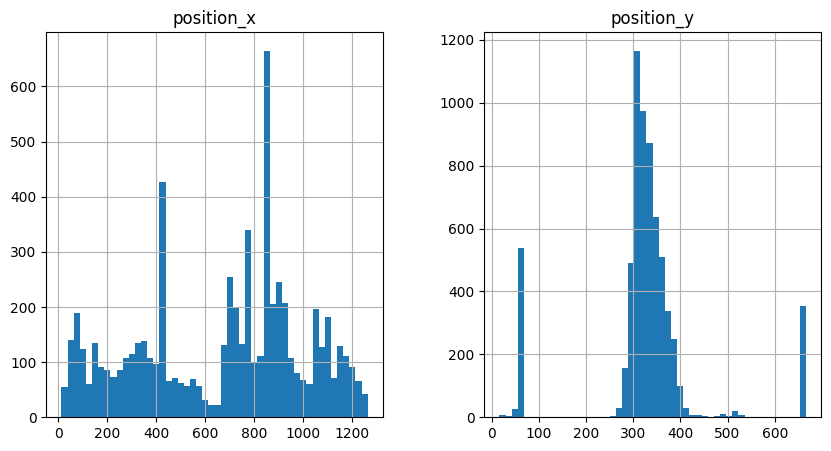

In [10]:
# Visualiser les distributions
data[["position_x", "position_y"]].hist(bins=50, figsize=(10, 5))
plt.show()

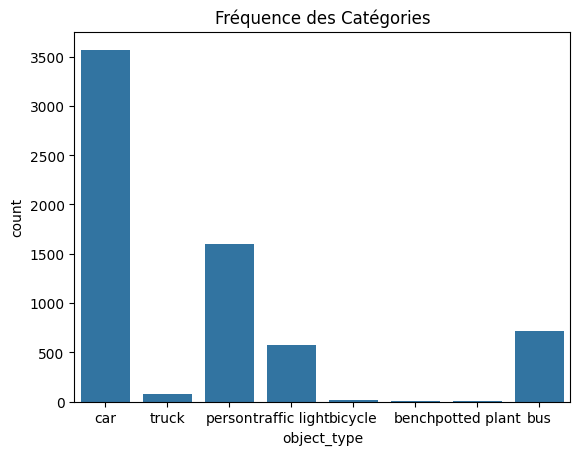

In [11]:
# Exemple : Supposons que la colonne s'appelle 'object_type'
sns.countplot(data=data, x='object_type')
plt.title("Fréquence des Catégories")
plt.show()


### suppression des classes non valides 

In [12]:
def filter_one_csv(input_file, output_file, valid_classes):
    # Charger les données
    data = pd.read_csv(input_file, sep=",")  # Lire sans en-tête
    
    # Filtrer les lignes où 'object_type' est dans valid_classes
    filtered_data = data[data['object_type'].isin(valid_classes)]
    
    # Sauvegarder les données filtrées dans un nouveau fichier CSV
    filtered_data.to_csv(output_file, index=False)
    print(f"Le fichier filtré a été sauvegardé dans : {output_file}")


In [13]:
def filter_all_csv_files(input_folder, output_folder, valid_classes):
    # Vérifier si le dossier de sortie existe, sinon le créer
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Parcourir tous les fichiers CSV dans le dossier d'entrée
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".csv"):
            input_file = os.path.join(input_folder, file_name)
            output_file = os.path.join(output_folder, file_name)
            
            # Appliquer le filtrage
            filter_one_csv(input_file, output_file, valid_classes)

In [14]:
# Exemple d'utilisation
input_folder = "../data/cleaned_annotations"
output_folder = "../data/cleaned_annotations"
valid_classes = ['person', 'bicycle', 'car', 'motorcycle', 'bus', 'train', 'truck']

filter_all_csv_files(input_folder, output_folder, valid_classes)

Le fichier filtré a été sauvegardé dans : ../data/cleaned_annotations\video1.csv
Le fichier filtré a été sauvegardé dans : ../data/cleaned_annotations\video10.csv
Le fichier filtré a été sauvegardé dans : ../data/cleaned_annotations\video11.csv
Le fichier filtré a été sauvegardé dans : ../data/cleaned_annotations\video12.csv
Le fichier filtré a été sauvegardé dans : ../data/cleaned_annotations\video2.csv
Le fichier filtré a été sauvegardé dans : ../data/cleaned_annotations\video3.csv
Le fichier filtré a été sauvegardé dans : ../data/cleaned_annotations\video4.csv
Le fichier filtré a été sauvegardé dans : ../data/cleaned_annotations\video5.csv
Le fichier filtré a été sauvegardé dans : ../data/cleaned_annotations\video6.csv
Le fichier filtré a été sauvegardé dans : ../data/cleaned_annotations\video7.csv
Le fichier filtré a été sauvegardé dans : ../data/cleaned_annotations\video8.csv
Le fichier filtré a été sauvegardé dans : ../data/cleaned_annotations\video9.csv


In [15]:
data = pd.read_csv("../data/cleaned_annotations/video1.csv")

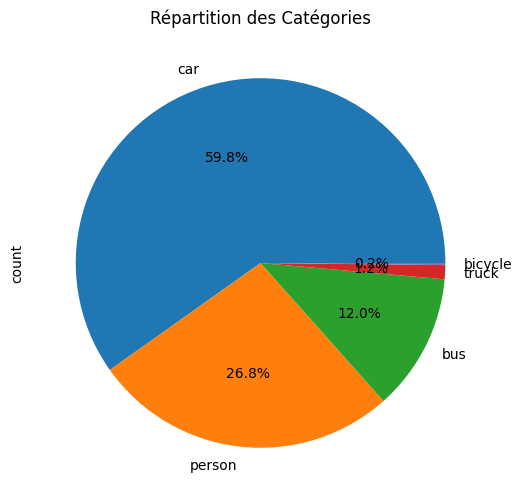

In [16]:
data['object_type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6))
plt.title("Répartition des Catégories")
plt.show()


### 3. Normalisation des données

In [17]:
def normalize_columns(input_file, output_file, columns_to_normalize):
    # Charger les données
    data = pd.read_csv(input_file)

    # Vérifier si les colonnes à normaliser existent dans le fichier
    for column in columns_to_normalize:
        if column not in data.columns:
            raise ValueError(f"Colonne '{column}' non trouvée dans {input_file}")

    # Appliquer la normalisation
    scaler = MinMaxScaler()
    data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

    # Sauvegarder le fichier normalisé
    data.to_csv(output_file, index=False)
    print(f"Les colonnes normalisées ont été sauvegardées dans : {output_file}")

In [18]:
def normalize_all_csv_files(input_folder, output_folder, columns_to_normalize):
    # Vérifier si le dossier de sortie existe, sinon le créer
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Parcourir tous les fichiers CSV dans le dossier d'entrée
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".csv"):
            input_file = os.path.join(input_folder, file_name)
            output_file = os.path.join(output_folder, file_name)

            # Normaliser les colonnes
            try:
                normalize_columns(input_file, output_file, columns_to_normalize)
            except ValueError as e:
                print(f"Erreur pour {file_name} : {e}")

In [19]:
# Exemple d'utilisation
input_folder = "../data/cleaned_annotations"
output_folder = "../data/cleaned_annotations"
columns_to_normalize = ["position_x", "position_y", "position_z", "object_length", "object_width", "object_height"]

normalize_all_csv_files(input_folder, output_folder, columns_to_normalize)

Les colonnes normalisées ont été sauvegardées dans : ../data/cleaned_annotations\video1.csv
Les colonnes normalisées ont été sauvegardées dans : ../data/cleaned_annotations\video10.csv
Les colonnes normalisées ont été sauvegardées dans : ../data/cleaned_annotations\video11.csv
Les colonnes normalisées ont été sauvegardées dans : ../data/cleaned_annotations\video12.csv
Les colonnes normalisées ont été sauvegardées dans : ../data/cleaned_annotations\video2.csv
Les colonnes normalisées ont été sauvegardées dans : ../data/cleaned_annotations\video3.csv
Les colonnes normalisées ont été sauvegardées dans : ../data/cleaned_annotations\video4.csv
Les colonnes normalisées ont été sauvegardées dans : ../data/cleaned_annotations\video5.csv
Les colonnes normalisées ont été sauvegardées dans : ../data/cleaned_annotations\video6.csv
Les colonnes normalisées ont été sauvegardées dans : ../data/cleaned_annotations\video7.csv
Les colonnes normalisées ont été sauvegardées dans : ../data/cleaned_annotati

In [20]:
data = pd.read_csv("../data/cleaned_annotations/video1.csv")
# Afficher les premières lignes des colonnes normalisées
data.head()

,video_id,frame_id,object_id,object_type,position_x,position_y,position_z,object_length,object_width,object_height,heading
0,1,0,1,car,0.922576,0.251611,0.0,0.394477,0.183967,0.394477,0
1,1,0,2,car,0.318802,0.173868,0.0,0.061528,0.050349,0.061528,0
2,1,0,3,car,0.027684,0.313070,0.0,0.208572,0.070792,0.208572,0
3,1,0,4,car,0.112547,0.282132,0.0,0.145800,0.111448,0.145800,0
4,1,0,5,car,0.812732,0.217397,0.0,0.195975,0.107720,0.195975,0


### 4. Encodage des caractéristiques catégorielles

In [21]:
def one_hot_encode_object_type(input_file, output_file, column_name="object_type"):
    # Charger les données
    data = pd.read_csv(input_file)

    # Vérifier si la colonne à encoder existe
    if column_name not in data.columns:
        raise ValueError(f"La colonne '{column_name}' n'existe pas dans {input_file}.")

    # Appliquer l'encodage one-hot
    data = pd.get_dummies(data, columns=[column_name], prefix="type")

    # Sauvegarder le fichier encodé
    data.to_csv(output_file, index=False)
    print(f"Encodage one-hot effectué et sauvegardé dans : {output_file}")

In [22]:
def encode_all_csv_files(input_folder, output_folder, column_name="object_type"):
    # Vérifier si le dossier de sortie existe, sinon le créer
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Parcourir tous les fichiers CSV dans le dossier d'entrée
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".csv"):
            input_file = os.path.join(input_folder, file_name)
            output_file = os.path.join(output_folder, file_name)

            # Appliquer l'encodage one-hot
            try:
                one_hot_encode_object_type(input_file, output_file, column_name)
            except ValueError as e:
                print(f"Erreur pour {file_name} : {e}")


In [23]:

# Exemple d'utilisation
input_folder = "../data/cleaned_annotations"
output_folder = "../data/cleaned_annotations"
column_name = "object_type"

encode_all_csv_files(input_folder, output_folder, column_name)

Encodage one-hot effectué et sauvegardé dans : ../data/cleaned_annotations\video1.csv
Encodage one-hot effectué et sauvegardé dans : ../data/cleaned_annotations\video10.csv
Encodage one-hot effectué et sauvegardé dans : ../data/cleaned_annotations\video11.csv
Encodage one-hot effectué et sauvegardé dans : ../data/cleaned_annotations\video12.csv
Encodage one-hot effectué et sauvegardé dans : ../data/cleaned_annotations\video2.csv
Encodage one-hot effectué et sauvegardé dans : ../data/cleaned_annotations\video3.csv
Encodage one-hot effectué et sauvegardé dans : ../data/cleaned_annotations\video4.csv
Encodage one-hot effectué et sauvegardé dans : ../data/cleaned_annotations\video5.csv
Encodage one-hot effectué et sauvegardé dans : ../data/cleaned_annotations\video6.csv
Encodage one-hot effectué et sauvegardé dans : ../data/cleaned_annotations\video7.csv
Encodage one-hot effectué et sauvegardé dans : ../data/cleaned_annotations\video8.csv
Encodage one-hot effectué et sauvegardé dans : ../d

### 5. Regrouper les données par object_id et trier par frame_id

In [24]:
# 1. Fusionner tous les fichiers CSV
def load_and_merge_csvs(input_folder):
    all_data = []
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".csv"):
            file_path = os.path.join(input_folder, file_name)
            data = pd.read_csv(file_path)
            all_data.append(data)
    merged_data = pd.concat(all_data, ignore_index=True)
    return merged_data

In [25]:
input_folder = "../data/cleaned_annotations"
data = load_and_merge_csvs(input_folder)
data

,video_id,frame_id,object_id,position_x,position_y,position_z,object_length,object_width,object_height,heading,type_bicycle,type_bus,type_car,type_person,type_truck,type_motorcycle,type_train
0,1,0,1,0.922576,0.251611,0.0,0.394477,0.183967,0.394477,0,False,False,True,False,False,NaN,NaN
1,1,0,2,0.318802,0.173868,0.0,0.061528,0.050349,0.061528,0,False,False,True,False,False,NaN,NaN
2,1,0,3,0.027684,0.313070,0.0,0.208572,0.070792,0.208572,0,False,False,True,False,False,NaN,NaN
3,1,0,4,0.112547,0.282132,0.0,0.145800,0.111448,0.145800,0,False,False,True,False,False,NaN,NaN
4,1,0,5,0.812732,0.217397,0.0,0.195975,0.107720,0.195975,0,False,False,True,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46433,12,1211,1163,0.661443,0.462582,0.0,0.219223,0.332629,0.219223,0,NaN,False,True,False,False,NaN,NaN
46434,12,1211,1166,0.593301,0.319538,0.0,0.186839,0.265090,0.186839,0,NaN,False,True,False,False,NaN,NaN
46435,12,1211,1134,0.356856,0.673014,0.0,0.516543,0.806190,0.516543,0,NaN,False,True,False,False,NaN,NaN
46436,12,1211,1171,0.204625,0.331048,0.0,0.089186,0.164140,0.089186,0,NaN,False,True,False,False,NaN,NaN


In [26]:

#Trier les données par video_id, object_id et frame_id
data = data.sort_values(by=['video_id', 'object_id', 'frame_id'])
data

,video_id,frame_id,object_id,position_x,position_y,position_z,object_length,object_width,object_height,heading,type_bicycle,type_bus,type_car,type_person,type_truck,type_motorcycle,type_train
0,1,0,1,0.922576,0.251611,0.0,0.394477,0.183967,0.394477,0,False,False,True,False,False,NaN,NaN
6,1,1,1,0.926416,0.254998,0.0,0.408794,0.176644,0.408794,0,False,False,True,False,False,NaN,NaN
12,1,2,1,0.936216,0.235260,0.0,0.372758,0.154750,0.372758,0,False,False,True,False,False,NaN,NaN
17,1,3,1,0.946428,0.257533,0.0,0.352897,0.131934,0.352897,0,False,False,True,False,False,NaN,NaN
23,1,4,1,0.962295,0.308398,0.0,0.289838,0.096484,0.289838,0,False,False,True,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46413,12,1207,1172,0.076148,0.383805,0.0,0.195905,0.317834,0.195905,0,NaN,False,True,False,False,NaN,NaN
46419,12,1208,1172,0.075940,0.384511,0.0,0.196295,0.318432,0.196295,0,NaN,False,True,False,False,NaN,NaN
46425,12,1209,1172,0.075895,0.383142,0.0,0.195292,0.317229,0.195292,0,NaN,False,True,False,False,NaN,NaN
46431,12,1210,1172,0.075868,0.383676,0.0,0.195712,0.317977,0.195712,0,NaN,False,True,False,False,NaN,NaN


### 6. Créer des séquences temporelles pour chaque objet

In [64]:
input_sequence_length = 10  # Nombre de frames pour la séquence d'entrée
output_sequence_length = 5  # Nombre de frames pour la séquence de sortie

In [82]:
len(data)

46438

In [99]:
# Fonction pour générer des séquences formatées
def create_sequences(data, input_sequence_length, output_sequence_length):
    input_sequences = []
    output_sequences = []
    
    # Regrouper les données par 'video_id' et 'object_id'
    grouped = data.groupby(['video_id', 'object_id'])
    for (video_id, object_id), group in grouped:
        # Trier les données par frame_id
        group = group.sort_values('frame_id').reset_index(drop=True)
        # print("################################# video :",video_id,"###object :",object_id)
        # print(group)
        # Vérifier que la séquence est assez longue
        total_frames = len(group)
        for start_idx in range(total_frames - input_sequence_length - output_sequence_length + 1):
            # print(total_frames)
            # print(start_idx)
            # Créer la séquence d'entrée
            input_sequence = group.iloc[start_idx:start_idx + input_sequence_length]
            input_sequence_flattened = []
            for _, row in input_sequence.iterrows():
                input_sequence_flattened.extend(row[['position_x', 'position_y', 'position_z']].values)
            
            # Créer la séquence de sortie
            output_sequence = group.iloc[start_idx + input_sequence_length:start_idx + input_sequence_length + output_sequence_length]
            output_sequence_flattened = []
            for _, row in output_sequence.iterrows():
                output_sequence_flattened.extend(row[['position_x', 'position_y', 'position_z']].values)
            
            # Ajouter les séquences d'entrée et de sortie
            input_sequences.append([video_id, object_id] + input_sequence_flattened)
            output_sequences.append([video_id, object_id] + output_sequence_flattened)
    # Nommer les colonnes pour les deux séquences
    input_columns = (
        ['video_id', 'object_id'] +
        [f'in_{i}_{dim}' for i in range(input_sequence_length) for dim in ['x', 'y', 'z']]
    )
    output_columns = (
        ['video_id', 'object_id'] +
        [f'out_{i}_{dim}' for i in range(output_sequence_length) for dim in ['x', 'y', 'z']]
    )
    print(input_columns)
    # Convertir en DataFrame pour faciliter l'utilisation (si nécessaire)
    input_sequences_df = pd.DataFrame(input_sequences, columns=input_columns)
    output_sequences_df = pd.DataFrame(output_sequences, columns=output_columns)
    
    return input_sequences_df, output_sequences_df


In [100]:

# Générer les séquences
input_sequences, output_sequences = create_sequences(data, input_sequence_length, output_sequence_length)

['video_id', 'object_id', 'in_0_x', 'in_0_y', 'in_0_z', 'in_1_x', 'in_1_y', 'in_1_z', 'in_2_x', 'in_2_y', 'in_2_z', 'in_3_x', 'in_3_y', 'in_3_z', 'in_4_x', 'in_4_y', 'in_4_z', 'in_5_x', 'in_5_y', 'in_5_z', 'in_6_x', 'in_6_y', 'in_6_z', 'in_7_x', 'in_7_y', 'in_7_z', 'in_8_x', 'in_8_y', 'in_8_z', 'in_9_x', 'in_9_y', 'in_9_z']


In [101]:
# Affichage des résultats
print("Input Sequences:")
input_sequences.head()

Input Sequences:


,video_id,object_id,in_0_x,in_0_y,in_0_z,in_1_x,in_1_y,in_1_z,in_2_x,in_2_y,...,in_6_z,in_7_x,in_7_y,in_7_z,in_8_x,in_8_y,in_8_z,in_9_x,in_9_y,in_9_z
0,1,2,0.318802,0.173868,0.0,0.316159,0.180730,0.0,0.312267,0.190732,...,0.0,0.283757,0.197503,0.0,0.281460,0.196681,0.0,0.279508,0.199219,0.0
1,1,2,0.316159,0.180730,0.0,0.312267,0.190732,0.0,0.307560,0.194824,...,0.0,0.281460,0.196681,0.0,0.279508,0.199219,0.0,0.277759,0.200997,0.0
2,1,2,0.312267,0.190732,0.0,0.307560,0.194824,0.0,0.301952,0.201398,...,0.0,0.279508,0.199219,0.0,0.277759,0.200997,0.0,0.274915,0.207948,0.0
3,1,2,0.307560,0.194824,0.0,0.301952,0.201398,0.0,0.297322,0.202481,...,0.0,0.277759,0.200997,0.0,0.274915,0.207948,0.0,0.269091,0.210940,0.0
4,1,2,0.301952,0.201398,0.0,0.297322,0.202481,0.0,0.285799,0.200851,...,0.0,0.274915,0.207948,0.0,0.269091,0.210940,0.0,0.262661,0.215902,0.0


In [102]:
print("\nOutput Sequences:")
output_sequences.head()


Output Sequences:


,video_id,object_id,out_0_x,out_0_y,out_0_z,out_1_x,out_1_y,out_1_z,out_2_x,out_2_y,out_2_z,out_3_x,out_3_y,out_3_z,out_4_x,out_4_y,out_4_z
0,1,2,0.277759,0.200997,0.0,0.274915,0.207948,0.0,0.269091,0.210940,0.0,0.262661,0.215902,0.0,0.261035,0.218408,0.0
1,1,2,0.274915,0.207948,0.0,0.269091,0.210940,0.0,0.262661,0.215902,0.0,0.261035,0.218408,0.0,0.259285,0.224235,0.0
2,1,2,0.269091,0.210940,0.0,0.262661,0.215902,0.0,0.261035,0.218408,0.0,0.259285,0.224235,0.0,0.257216,0.225035,0.0
3,1,2,0.262661,0.215902,0.0,0.261035,0.218408,0.0,0.259285,0.224235,0.0,0.257216,0.225035,0.0,0.255281,0.224530,0.0
4,1,2,0.261035,0.218408,0.0,0.259285,0.224235,0.0,0.257216,0.225035,0.0,0.255281,0.224530,0.0,0.249283,0.228068,0.0


In [103]:
# Sauvegarder les séquences dans des fichiers CSV
input_sequences.to_csv('../data/annotations_transformers/input_sequences.csv', index=False)
output_sequences.to_csv('../data/annotations_transformers/output_sequences.csv', index=False)

### 7. Convertir les séquences en tenseurs

### 9. Sauvegarde des données prétraitées